# Travel Insurance

Created By : Muhammad Dangga

**Contents**

1. Bussiness Problem Understanding
1. Data Understanding
1. Data Preprocessing
1. Modeling
1. Conclusion
1. Recommendation 

# Bussiness Problem Understanding

**Context**


Dalam industri asuransi perjalanan, perusahaan berupaya memberikan polis yang tidak hanya kompetitif tetapi juga cukup memadai untuk menanggung risiko yang terkait dengan perjalanan pelanggan. Dengan meningkatnya jumlah pelancong setiap tahun, ada kebutuhan untuk memahami berbagai faktor yang mempengaruhi klaim asuransi. Mengelola dan memprediksi klaim ini penting untuk menjaga keseimbangan antara memberikan perlindungan kepada pelanggan dan menjaga keberlanjutan finansial perusahaan asuransi.

**Problem Statement**

Salah satu tantangan utama adalah memprediksi kemungkinan seorang pelanggan mengajukan klaim asuransi perjalanan. Prediksi yang tidak akurat dapat menyebabkan kerugian finansial bagi perusahaan asuransi dan dapat menyebabkan harga premi yang tidak optimal bagi pelanggan.

**Goals**

Pendekatan analitik yang akan digunakan adalah sebagai berikut:

1. Melakukan analisis eksploratif data untuk memahami distribusi dan hubungan antar variabel.

1. Menerapkan algoritma klasifikasi untuk membangun model yang dapat memprediksi peluang klaim.


**Analytich Approach**

Kita akan menganalisis data untuk menepukan pola seseorang akan mengclaim asuransinya atau tidak.

Setelahnya kita akan membangun model klasifikasi untuk membantu perusahaan dalam menemukan kriteria apa saja yang mungkin merupakan faktor penentu seseorang akan melakukan claim insurance.

**Metric Evaluation**

Type 1 error : False Positive
Dampak: kerugian karena kesalahan prediksi claim padahal tidak terjadi membuat perusahaan kehilangan salah satu customer menguntungkan

Type 2 error : False Negative
Dampak: Kerugian financial saat ternyata customer yang di prediksi tidak melakukan claim ternyata justru melakukan claim asuransi, semakin banyak error maka kerugian perusahaan terlalu menjadi besar.

Karena dampak dari False Negative bisa sangat merugikan perusahaan asuransi makan kita akan menggunakan metric recall.

# Data Understanding

Data Source : https://drive.google.com/drive/folders/1iVx5k6tWglqfHb05o0DElg8JHg7VVG_J

**Features**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Agency | Text | Nama Agency |
| Agency Type | Text | Jenis Asuransi Perjalanan |
| Distributin Channel | Text |  Channel agency Asuransi Perjalanan |
| Product Name | Text | Nama produk asuransi perjalanan |
| Gender | Text | Jenis Kelamin Pengguna |
| Duration | Integer | Durasi Perjalanan |
| Destination | Text | Tujuan Perjalanan |
| Net Sales | Float | Jumlah Penjualan Polis Asuransi Perjalanan |
| Commission | Float | Komisi yang diterima untuk agency asuransi
| Age | integer | Usia Pengguna |
| Claim | Text | Usia Tertanggung |

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

# Imbalance Dataset
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Save Model
import joblib

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [201]:
df = pd.read_csv("data_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


# Data Cleaning

Pertama mari kita bersihan data agar siap di gunakan

In [203]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Setelah kita melihat distrbusi data terdapat anomali pada duration dan age.

1. pada kolom duration di temui bahwa terdapat data yang memiliki nilai -1 sehingga tidak mungkin jika durasi sebuah perjalan bernilai minus minus.

1. pada kolom age di temui bahwa terdapat data yang memiliki nilai max 118, nilai tersebut tidak relevan dengan umur manusia saat ini maka bisa di katakan bahwa data tersebut tidak valid dan perlu di hapus 

menghapus anomali

In [204]:
# Menghapus baris dengan 'duration' -1
df.drop(df[df['Duration'] == -1].index, inplace=True)

# Menghapus baris dengan 'age' 118
df.drop(df[df['Age'] == 118].index, inplace=True)

mari kita cek kembali

In [205]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,43652.000000,43652.000000,43652.000000,43652.000000
mean,49.736369,40.406396,9.558039,38.716531
std,109.882072,48.648192,19.608595,10.094275
min,0.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.000000,0.000000,36.000000
75%,53.000000,48.000000,10.500000,42.000000
max,4881.000000,682.000000,262.760000,88.000000


Masih di temukan anomali dimana minimum duration dan age bernilai 0 hal ini tidak mungkin karena durasi perjalan dan umur tidak mungkin bernilai 0, mari kita hapus.

In [206]:
df.drop(df[df['Duration'] == 0].index, inplace=True)

df.drop(df[df['Age'] == 0].index, inplace=True)

mari kita cek kembali

In [207]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,43621.000000,43621.000000,43621.000000,43621.000000
mean,49.767406,40.427208,9.560950,38.716696
std,109.913217,48.658014,19.614819,10.089747
min,1.000000,-357.500000,0.000000,1.000000
25%,10.000000,18.000000,0.000000,35.000000
50%,22.000000,26.000000,0.000000,36.000000
75%,53.000000,48.000000,10.500000,42.000000
max,4881.000000,682.000000,262.760000,88.000000


Anomali sudah di handle mari kita lanjutkan untuk mengecek missing value pada dataset.

In [208]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,15,"[KML, SSI]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[2 way Comprehensive Plan, Individual Comprehe..."
4,Gender,object,31533,72.29,2,"[M, F]"
5,Duration,int64,0,0.00,435,"[2, 238]"
6,Destination,object,0,0.00,136,"[TURKMENISTAN, MALDIVES]"
7,Net Sales,float64,0,0.00,986,"[319.0, 168.0]"
8,Commision (in value),float64,0,0.00,885,"[5.55, 28.35]"
9,Age,int64,0,0.00,87,"[56, 40]"


1. Pertama kita menemukan bahwa data kosong tidak di temui pada kolom lain selain gender, dalam hal ini kita juga tidak dapat mengidentifikasi gender seseorang dari data-data yang di sediakan, tidak ada variabel yang dapat mengidentifikasi gender seseorang.

1. dalam case ini kolom gender juga tidak relevan untuk di digunakan dalam model machine lerning kali ini, karena kolom gender tidak dapat mengindetifikasikan seseorang akan melakukan claim asuransi atau tidak, sehingga kolom gender dapat kita hapus.

1. di karenakan tidak ada kolom id pengguna, kita juga tidak dapat mengidentifikasi apakah terdapat data duplicate pada dataset, maka akan kita asumsikan saja bahwa dataset tidak memiliki duplicate data.

Menghapus kolom gender.

In [209]:
df.drop(['Gender'],axis=1, inplace=True)

In [210]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,15,"[JZI, SSI]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.0,2,"[Offline, Online]"
3,Product Name,object,0,0.0,26,"[Cancellation Plan, 2 way Comprehensive Plan]"
4,Duration,int64,0,0.0,435,"[147, 393]"
5,Destination,object,0,0.0,136,"[ARMENIA, ISRAEL]"
6,Net Sales,float64,0,0.0,986,"[182.4, 75.0]"
7,Commision (in value),float64,0,0.0,885,"[12.14, 5.88]"
8,Age,int64,0,0.0,87,"[70, 7]"
9,Claim,object,0,0.0,2,"[Yes, No]"


Data Cleaning selesai, kita cek Imbalance data

# Cek Imbalance Data

cek distribusi Value Claim

In [211]:
df['Claim'].value_counts()/df.shape[0]

No     0.98464
Yes    0.01536
Name: Claim, dtype: float64

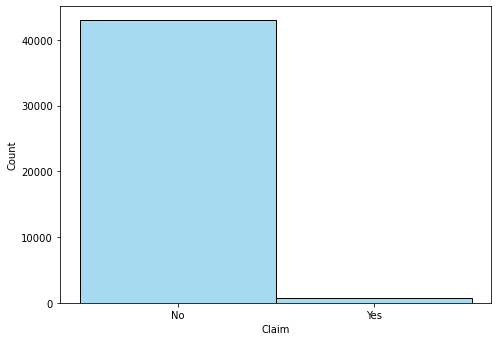

In [212]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df, x='Claim', color='skyblue')
plt.show()

Terlihat terjadi data imbalance yang cukup besar antara value No dan Yes

Kita lanjutkan dengan melakukan Imbalance over_Sampling pada value Yes

In [213]:
encoder_dict = {}

# Encode nilai kategorikal menjadi numerik
for column in df.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoder_dict[column] = encoder

In [214]:
x = df.drop('Claim', axis=1)
y = df['Claim']

In [215]:
print(x.shape)
print(y.shape)

(43621, 9)
(43621,)


In [216]:
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [217]:
print(x_resampled.shape)
print(y_resampled.shape)

(85902, 9)
(85902,)


In [218]:
df_resampled = pd.DataFrame(x_resampled, columns=x.columns)
df_resampled['Claim'] = y_resampled

In [219]:
df_resampled

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2,0,1,4,365,109,216.000000,54.000000,57,0
1,7,1,1,10,4,73,10.000000,0.000000,33,0
2,8,0,1,8,19,52,22.000000,7.700000,26,0
3,7,1,1,1,20,128,112.000000,0.000000,59,0
4,2,0,1,9,8,109,16.000000,4.000000,28,0
...,...,...,...,...,...,...,...,...,...,...
85897,4,1,0,13,6,73,26.340254,10.237827,25,1
85898,2,0,1,17,13,109,75.872308,18.964203,33,1
85899,8,0,1,8,14,23,29.217692,10.226192,48,1
85900,2,0,1,12,13,109,47.720530,11.932534,39,1


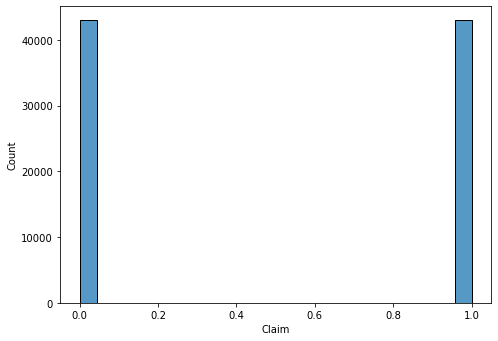

In [220]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=y_resampled)
plt.show()

Mengembalikan Variable object ke bentuk semula untuk kebutuhan Analisis target

In [221]:
for column, encoder in encoder_dict.items():
    if column in df_resampled.columns:
        df_resampled[column] = encoder.inverse_transform(df_resampled[column])

In [222]:
df_resampled

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.000000,54.000000,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.000000,0.000000,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.000000,7.700000,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.000000,0.000000,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.000000,4.000000,28,No
...,...,...,...,...,...,...,...,...,...,...
85897,CCR,Travel Agency,Offline,Gold Plan,6,MALAYSIA,26.340254,10.237827,25,Yes
85898,C2B,Airlines,Online,Silver Plan,13,SINGAPORE,75.872308,18.964203,33,Yes
85899,JZI,Airlines,Online,Basic Plan,14,CHINA,29.217692,10.226192,48,Yes
85900,C2B,Airlines,Online,Comprehensive Plan,13,SINGAPORE,47.720530,11.932534,39,Yes


# Data Analisis & Feature Selection

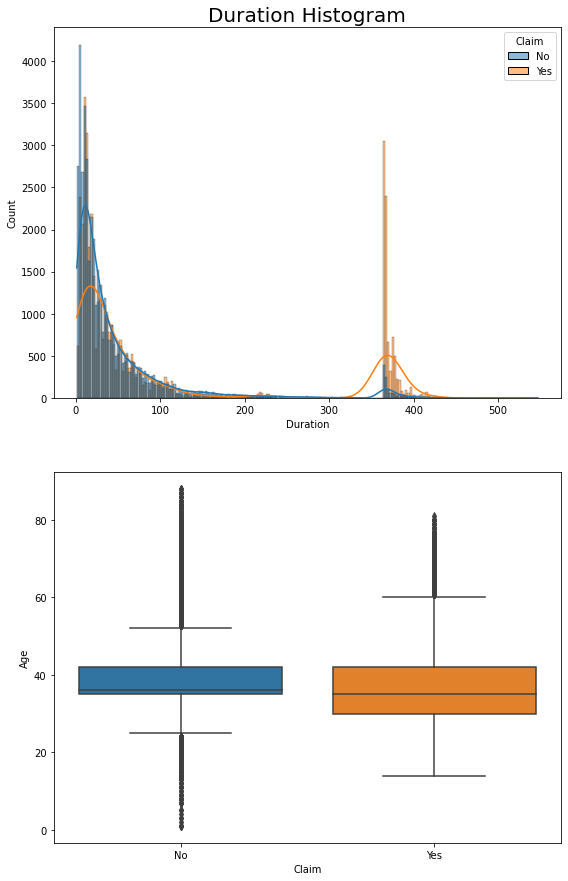

In [223]:
# Membuang outlier data di atas 700
df_resampled1 = df_resampled.loc[df_resampled['Duration'] <= 700]

plt.figure(figsize=(20,15))

plt.subplot(221)
sns.histplot(data=df_resampled1, x='Duration', hue='Claim', kde=True,) #log_scale=True
plt.title('Duration Histogram', fontsize=20)

plt.subplot(223)
sns.boxplot(data=df_resampled1,y='Age', x='Claim')
plt.show()

1. terlihat pada histogram Duration terdapat sebuah pola dimana persebaran value yes di dominasi di pada duration di atas 300

Mari kita cek dengan histogram terpisah antara value yes dan no

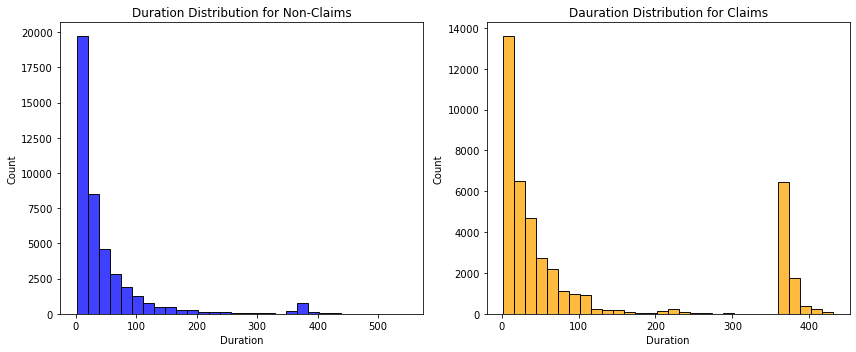

In [224]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  
sns.histplot(df_resampled1[df_resampled1['Claim'] == 'No']['Duration'], bins=30, kde=False, color='blue')
plt.title('Duration Distribution for Non-Claims')

plt.subplot(1, 2, 2)
sns.histplot(df_resampled1[df_resampled1['Claim'] == 'Yes']['Duration'], bins=30, kde=False, color='orange')
plt.title('Dauration Distribution for Claims')

plt.tight_layout()
plt.show()

Ternyata Value yes di yang paling beresiko terjado di atas nilai 200

Mari kita cek histogram pemisahan untuk umur

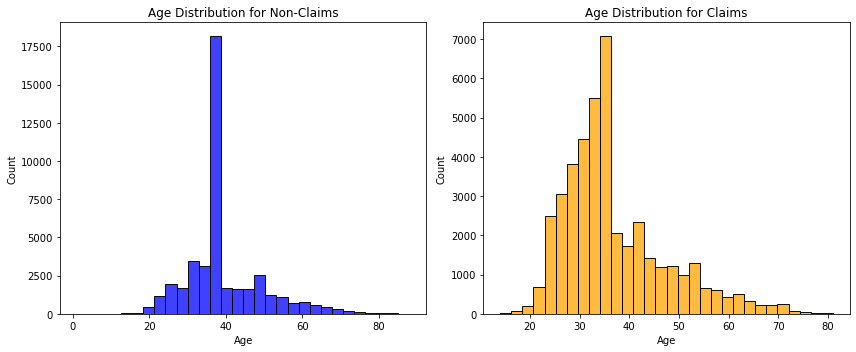

In [225]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  
sns.histplot(df_resampled1[df_resampled1['Claim'] == 'No']['Age'], bins=30, kde=False, color='blue')
plt.title('Age Distribution for Non-Claims')

plt.subplot(1, 2, 2)
sns.histplot(df_resampled1[df_resampled1['Claim'] == 'Yes']['Age'], bins=30, kde=False, color='orange')
plt.title('Age Distribution for Claims')

plt.tight_layout()
plt.show()

Terlihat ternyata umur tidak memiliki acuan pasti seseorang melakukan claim atau tidak, mungkin visualisasi histogram tidak memberikan informasi yang cukup

mari kita lakukan dengan density plot

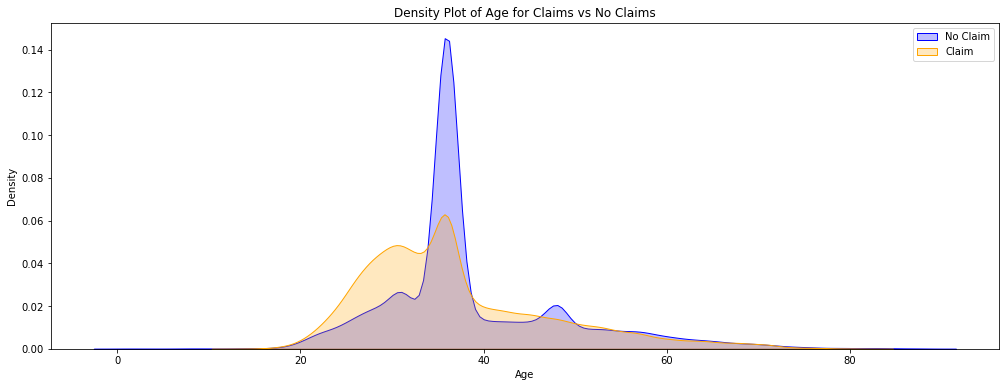

In [226]:
plt.figure(figsize=(17, 6))

sns.kdeplot(data=df_resampled[df_resampled['Claim'] == 'No'], x='Age', shade=True, label='No Claim', color='blue')

sns.kdeplot(data=df_resampled[df_resampled['Claim'] == 'Yes'], x='Age', shade=True, label='Claim', color='orange')

plt.title('Density Plot of Age for Claims vs No Claims')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

Terlihat bahwa persebaran seseorang akan melakukan claim atau tidak memiliki persebaran yang sama.

Mari kita lihat lagi dengan scatter plot persebaran claim yes dan no berdasarkan duration dan umur.

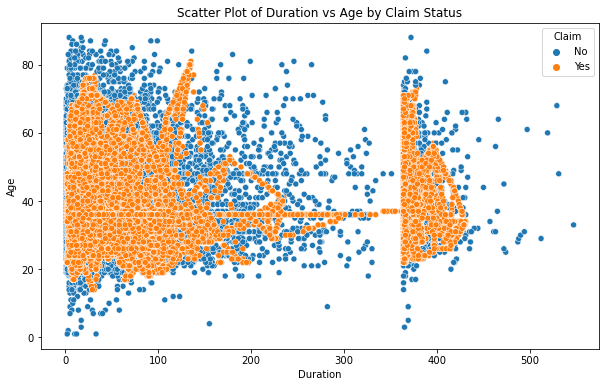

In [227]:
# handle outlier
df_resampled1 = df_resampled.loc[df_resampled['Duration'] <= 700]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_resampled1, x='Duration', y='Age', hue='Claim')
plt.title('Scatter Plot of Duration vs Age by Claim Status')
plt.xlabel('Duration')
plt.ylabel('Age')
plt.legend(title='Claim')
plt.show()

In [228]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df_resampled1['Age Group'] = pd.cut(df_resampled1['Age'], bins=bins, labels=labels, right=False)
1
grouped = df_resampled1.groupby(['Age Group', 'Claim']).size().unstack().fillna(0)
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
normalized_grouped['count'] = df_resampled1.groupby('Age Group')['Claim'].count()

display(normalized_grouped)

Claim,No,Yes,count
Age Group,,,
1-10,1.000000,0.000000,24
11-20,0.518771,0.481229,293
21-30,0.334357,0.665643,15298
31-40,0.558169,0.441831,45359
41-50,0.482083,0.517917,13423
51-60,0.493584,0.506416,7403
61-70,0.527708,0.472292,3176
71-80,0.540244,0.459756,820
81-90,0.913043,0.086957,92


In [229]:
bins = [0, 25, 50, 75, 100, 125, 150, 200, 400, 550]
labels = ['<25', '25-50', '51-75', '76-100', '101-125', '126-150', '151-200', '201-400', '400>']
df_resampled1['Duration Group'] = pd.cut(df_resampled1['Duration'], bins=bins, labels=labels, right=False)
1
grouped = df_resampled1.groupby(['Duration Group', 'Claim']).size().unstack().fillna(0)
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
normalized_grouped['count'] = df_resampled1.groupby('Duration Group')['Claim'].count()

display(normalized_grouped)

Claim,No,Yes,count
Duration Group,,,
<25,0.560685,0.439315,40504
25-50,0.528131,0.471869,16761
51-75,0.504922,0.495078,8330
76-100,0.574074,0.425926,4158
101-125,0.499612,0.500388,2580
126-150,0.679548,0.320452,1061
151-200,0.762402,0.237598,1149
201-400,0.162932,0.837068,10888
400>,0.266958,0.733042,457


Dari Scatter Plot di atas kita memiliki 2 temuan :

1. ternyata terdapat batas bawah dan atas sebagai umur yang aman yaitu <10 dan di atas 80> persebaran data yes sangat sedikit bahkan tidak di temui pada data di bawah 10 tahun>.

2. Pada duration terdapat 2 kelompok besar persebaran value yes di bawah 200 dan di atas 350. 

Kita akan mengecek pengaruh dari Agency Type

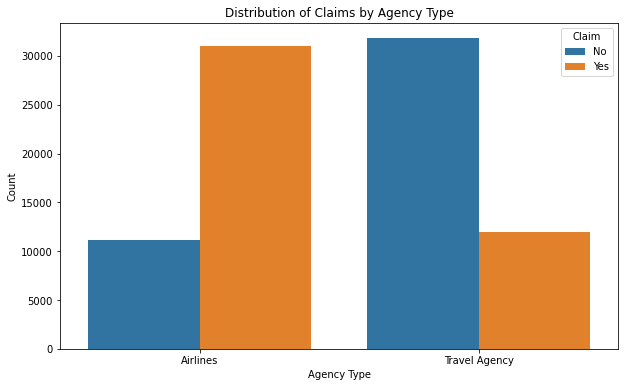

In [230]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Agency Type', hue='Claim', data=df_resampled)
plt.title('Distribution of Claims by Agency Type')
plt.xlabel('Agency Type')
plt.ylabel('Count')
plt.legend(title='Claim', labels=['No', 'Yes'])
plt.show()


In [231]:
grouped = df_resampled1.groupby(['Agency Type', 'Claim']).size().unstack().fillna(0)
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
normalized_grouped['count'] = df_resampled1.groupby('Agency Type')['Claim'].count()
display(normalized_grouped.sort_values(by='Yes', ascending=False))

Claim,No,Yes,count
Agency Type,,,
Airlines,0.264278,0.735722,42092
Travel Agency,0.726391,0.273609,43796


di sini di dapatkan asumsi lagi bahwa kebanyakan asuransi yang di claim terdapat pada Airlanes dan hal ini menjadi tolak ukur yang bisa di perhitungkan.


Walaupun agency tidak berpengaruh pada hasil analisis, kita bisa mengecek kebenaran analisi yang di hasilkan dari agency type dengan melihat agencynya 

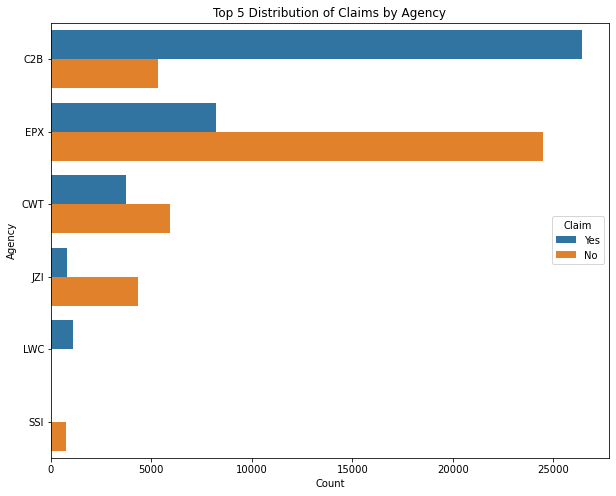

In [232]:
destination_counts = df_resampled.groupby('Agency')['Claim'].value_counts().reset_index(name='Count')

top_destinations = destination_counts.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Agency', hue='Claim', data=top_destinations)
plt.title('Top 5 Distribution of Claims by Agency')
plt.xlabel('Count')
plt.ylabel('Agency')
plt.legend(title='Claim')
plt.show()

In [233]:
grouped = df_resampled1.groupby(['Agency', 'Claim']).size().unstack().fillna(0)
grouped1 = df_resampled1.groupby(['Agency', 'Agency Type']).size().unstack().fillna(0)
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
normalized_grouped['count'] = df_resampled1.groupby('Agency')['Claim'].count()
normalized_grouped['count'] = df_resampled1.groupby('Agency')['Agency Type'].count()
display(normalized_grouped.sort_values(by='Yes', ascending=False).head(10), grouped1.head(10))

Claim,No,Yes,count
Agency,,,
CSR,0.100299,0.899701,668
CBH,0.115450,0.884550,589
CCR,0.132695,0.867305,731
C2B,0.168024,0.831976,31793
LWC,0.278033,0.721967,1525
KML,0.289916,0.710084,952
CWT,0.612683,0.387317,9651
EPX,0.749411,0.250589,32687
SSI,0.833525,0.166475,871


Agency Type,Airlines,Travel Agency
Agency,,
ADM,0.0,54.0
ART,193.0,0.0
C2B,31793.0,0.0
CBH,514.0,75.0
CCR,571.0,160.0
CSR,547.0,121.0
CWT,670.0,8981.0
EPX,1347.0,31340.0
JZI,4844.0,298.0


Bisa kita ambil contoh pada C2B, Agency tersebut memiliki persentase yes 83% karena seluruh agency type nya merupakan Airlines.

Mari kita lihat persebaran Claim pada produk insurance

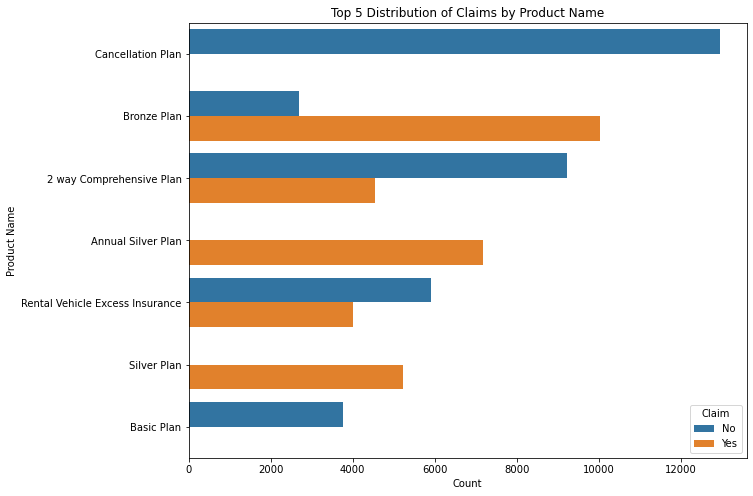

In [234]:
destination_counts = df_resampled.groupby('Product Name')['Claim'].value_counts().reset_index(name='Count')

top_destinations = destination_counts.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Product Name', hue='Claim', data=top_destinations)
plt.title('Top 5 Distribution of Claims by Product Name')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.legend(title='Claim')
plt.show()

In [235]:
grouped = df_resampled1.groupby(['Product Name', 'Claim']).size().unstack().fillna(0)
grouped1 = df_resampled1.groupby(['Product Name', 'Agency Type']).size().unstack().fillna(0)
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
normalized_grouped['count'] = df_resampled1.groupby('Product Name')['Claim'].count()
display(normalized_grouped.sort_values(by='Yes', ascending=False).head(10),normalized_grouped.sort_values(by='No', ascending=False).head(10),grouped1.head(20))

Claim,No,Yes,count
Product Name,,,
Travel Cruise Protect Family,0.007874,0.992126,127
Child Comprehensive Plan,0.010444,0.989556,766
Annual Travel Protect Platinum,0.049307,0.950693,649
Annual Travel Protect Gold,0.057613,0.942387,972
Individual Comprehensive Plan,0.060759,0.939241,790
Spouse or Parents Comprehensive Plan,0.068966,0.931034,174
Annual Gold Plan,0.070156,0.929844,1796
Annual Travel Protect Silver,0.105769,0.894231,520
Annual Silver Plan,0.107681,0.892319,8033


Claim,No,Yes,count
Product Name,,,
Value Plan,0.971470,0.028530,1367
Cancellation Plan,0.910408,0.089592,14220
1 way Comprehensive Plan,0.839163,0.160837,2773
Basic Plan,0.835365,0.164635,4513
Ticket Protector,0.743091,0.256909,977
Travel Cruise Protect,0.727083,0.272917,480
2 way Comprehensive Plan,0.669692,0.330308,13772
Rental Vehicle Excess Insurance,0.595528,0.404472,9929
Single Trip Travel Protect Silver,0.346626,0.653374,326


Agency Type,Airlines,Travel Agency
Product Name,,
1 way Comprehensive Plan,17,2756
2 way Comprehensive Plan,232,13540
24 Protect,424,166
Annual Gold Plan,1607,189
Annual Silver Plan,7847,186
Annual Travel Protect Gold,232,740
Annual Travel Protect Platinum,223,426
Annual Travel Protect Silver,221,299
Basic Plan,4321,192


Dari barplot dan table produtc name tersebut kita mendapatkan asumsi bahwa produk mempengaruhi, ada banyak product yang justru sering terjadi claim, contoh pada Annual silver plan

Mari kita Cek dengan kolom Destination

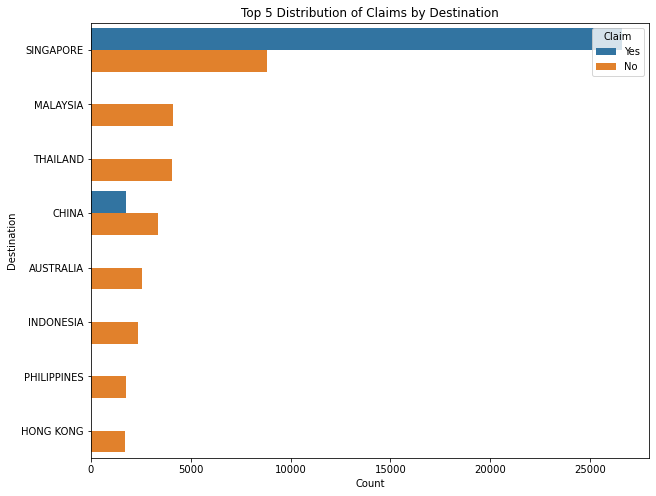

In [236]:
destination_counts = df_resampled.groupby('Destination')['Claim'].value_counts().reset_index(name='Count')

# Mengurutkan nilai dan mengambil 5 teratas
top_destinations = destination_counts.sort_values(by='Count', ascending=False).head(10)

# Membuat barplot dengan hanya 5 destinasi teratas
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Destination', hue='Claim', data=top_destinations)
plt.title('Top 5 Distribution of Claims by Destination')
plt.xlabel('Count')
plt.ylabel('Destination')
plt.legend(title='Claim')
plt.show()

In [237]:
grouped = df_resampled1.groupby(['Destination', 'Claim']).size().unstack().fillna(0)
# grouped1 = df_resampled1.groupby(['Destination', 'Agency Type', 'Product Name']).size().unstack().fillna(0)
# grouped1 = df_resampled1['Destination'] == 'ANGOLA'
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
normalized_grouped['count'] = df_resampled1.groupby('Destination')['Claim'].count()
display(normalized_grouped.sort_values(by='Yes', ascending=False).head(10),normalized_grouped.sort_values(by='No', ascending=False).head(10),df_resampled1[df_resampled1['Destination'] == 'TAJIKISTAN'])

Claim,No,Yes,count
Destination,,,
TAJIKISTAN,0.004348,0.995652,230
JAMAICA,0.007353,0.992647,136
TURKMENISTAN,0.007692,0.992308,130
"IRAN, ISLAMIC REPUBLIC OF",0.009346,0.990654,107
CAYMAN ISLANDS,0.010309,0.989691,97
TRINIDAD AND TOBAGO,0.014085,0.985915,142
GUYANA,0.017544,0.982456,57
NIGERIA,0.017857,0.982143,56
GUINEA-BISSAU,0.018182,0.981818,55


Claim,No,Yes,count
Destination,,,
ANGOLA,1.000000,0.000000,1
ARGENTINA,1.000000,0.000000,13
ZAMBIA,1.000000,0.000000,2
ZIMBABWE,1.000000,0.000000,3
ARMENIA,1.000000,0.000000,1
MYANMAR,0.960067,0.039933,601
PHILIPPINES,0.929638,0.070362,1876
BRUNEI DARUSSALAM,0.923729,0.076271,590
CAMBODIA,0.907162,0.092838,377


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age Group,Duration Group
34634,EPX,Travel Agency,Online,2 way Comprehensive Plan,53,TAJIKISTAN,112.000000,0.000000,36,No,31-40,51-75
43628,EPX,Travel Agency,Online,24 Protect,72,TAJIKISTAN,52.078893,0.000000,23,Yes,21-30,51-75
43673,C2B,Airlines,Offline,Child Comprehensive Plan,104,TAJIKISTAN,29.703162,9.384053,30,Yes,31-40,101-125
43866,CCR,Airlines,Online,Annual Travel Protect Gold,78,TAJIKISTAN,101.911480,13.742566,32,Yes,31-40,76-100
43917,CWT,Airlines,Online,24 Protect,61,TAJIKISTAN,21.651816,0.770391,36,Yes,31-40,51-75
...,...,...,...,...,...,...,...,...,...,...,...,...
85192,EPX,Travel Agency,Online,2 way Comprehensive Plan,31,TAJIKISTAN,26.047361,0.000000,36,Yes,31-40,25-50
85199,C2B,Airlines,Offline,Comprehensive Plan,101,TAJIKISTAN,30.349270,9.666525,31,Yes,31-40,101-125
85490,CCR,Airlines,Offline,Comprehensive Plan,78,TAJIKISTAN,32.456026,10.120254,67,Yes,61-70,76-100
85544,JZI,Airlines,Online,Spouse or Parents Comprehensive Plan,9,TAJIKISTAN,34.562584,16.987792,56,Yes,51-60,<25


terlihat bahwa negara tajikistan miliki kontribusi yes yang tinggi, dari salah satu sample nya membuktikan bahwa terdapat pengaruh dari 2 aspek agency type, product 

# insight

feature yang mempengaruhi Dependent variable claim:

1. Agency Type : menurut analisis type agency claim dari pengguna banyak terjadi di  agency type Airlanes
2. Product Name : menurut analisis beberapa product tertanya memiliki persentase yang lebih besar untuk di claim
3. Duration : pada nilai di atas 200 terjadi banyak kasus claim oleh pengguna pengguna, wajar saja karena makin lama durasinya makin besar kemungkinan terjadi sesuatu dan semakin besar kemungkin pengguna akan melakukan claim asuransinya.

4. Destination : beberapa destination ternyata memiliki angka persentase claim yang tinggi terkadang lebih besar dari No Claimnya.


# Encode

In [291]:
df = pd.read_csv("data_travel_insurance.csv")

df.drop(['Gender','Commision (in value)', 'Agency','Net Sales','Distribution Channel',],axis=1, inplace=True)
df.drop(df[df['Duration'] == -1].index, inplace=True)
df.drop(df[df['Age'] == 118].index, inplace=True)
df.drop(df[df['Duration'] == 0].index, inplace=True)
df.drop(df[df['Age'] == 0].index, inplace=True)


In [292]:
transformer = ColumnTransformer([
    ('onehotencoder', OneHotEncoder(drop='first'), ['Agency Type', 'Product Name', 'Duration', 'Destination'])
], remainder='passthrough')

In [293]:
X = transformer.fit_transform(df.drop('Claim', axis=1))
y = df['Claim']

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [295]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Modeling

In [298]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


**Training Model untuk data tanpa Oversampling**

In [311]:
models = [logreg, knn] 

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

          No       0.99      1.00      0.99      8610
         Yes       0.00      0.00      0.00       115

    accuracy                           0.99      8725
   macro avg       0.49      0.50      0.50      8725
weighted avg       0.97      0.99      0.98      8725

              precision    recall  f1-score   support

          No       0.99      1.00      0.99      8610
         Yes       0.00      0.00      0.00       115

    accuracy                           0.99      8725
   macro avg       0.49      0.50      0.50      8725
weighted avg       0.97      0.99      0.98      8725



Table di atas menunjukan hasil prediksi yang di lakukan dengan algoritma LogisticRegression dan KNN


In [308]:
models = [dt, rf]

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

          No       0.99      0.99      0.99      8610
         Yes       0.02      0.02      0.02       115

    accuracy                           0.98      8725
   macro avg       0.50      0.50      0.50      8725
weighted avg       0.97      0.98      0.98      8725

              precision    recall  f1-score   support

          No       0.99      0.99      0.99      8610
         Yes       0.02      0.01      0.01       115

    accuracy                           0.98      8725
   macro avg       0.50      0.50      0.50      8725
weighted avg       0.97      0.98      0.98      8725



Table di atas menunjukan hasil prediksi yang di lakukan dengan algoritma DecisionTreeClassifier dan RandomForestClassifier

**Training Model untuk data tanpa Oversampling**

Untuk melihat hasil dari Data Balance

In [309]:
models = [logreg, knn] 

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_resampled, y_resampled)
    y_pred_smote = model.predict(X_test)
    print(classification_report(y_test, y_pred_smote))

for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

          No       1.00      0.80      0.88      8610
         Yes       0.04      0.70      0.08       115

    accuracy                           0.79      8725
   macro avg       0.52      0.75      0.48      8725
weighted avg       0.98      0.79      0.87      8725

              precision    recall  f1-score   support

          No       0.99      0.82      0.90      8610
         Yes       0.02      0.32      0.04       115

    accuracy                           0.81      8725
   macro avg       0.51      0.57      0.47      8725
weighted avg       0.98      0.81      0.88      8725



Table di atas menunjukan hasil prediksi yang di lakukan dengan algoritma LogisticRegression dan KNN dengan data hasil OverSampling

In [310]:
models = [dt, rf] 

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Latih model dengan data SMOTE
    model.fit(X_resampled, y_resampled)
    # Prediksi pada data asli (evaluasi dengan data yang tidak di-oversampling)
    y_pred_smote = model.predict(X_test)
    # Evaluasi model
    print(classification_report(y_test, y_pred_smote))

# Evaluasi setiap model
for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

          No       0.99      0.99      0.99      8610
         Yes       0.02      0.03      0.03       115

    accuracy                           0.97      8725
   macro avg       0.51      0.51      0.51      8725
weighted avg       0.97      0.97      0.97      8725

              precision    recall  f1-score   support

          No       0.99      0.99      0.99      8610
         Yes       0.02      0.02      0.02       115

    accuracy                           0.98      8725
   macro avg       0.50      0.50      0.50      8725
weighted avg       0.97      0.98      0.98      8725



Table di atas menunjukan hasil prediksi yang di lakukan dengan algoritma DecisionTreeClassifier dan RandomForestClassifier dengan Data OverSampling

In [312]:
models = [logreg] 

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Latih model dengan data SMOTE
    model.fit(X_resampled, y_resampled)
    # Prediksi pada data asli (evaluasi dengan data yang tidak di-oversampling)
    y_pred_smote = model.predict(X_test)
    # Evaluasi model
    print(classification_report(y_test, y_pred_smote))

# Evaluasi setiap model
for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

          No       1.00      0.80      0.88      8610
         Yes       0.04      0.70      0.08       115

    accuracy                           0.79      8725
   macro avg       0.52      0.75      0.48      8725
weighted avg       0.98      0.79      0.87      8725



Berdarkan Recallnya algoritma LogisticRegression memiliki hasil yang paling aman untuk memprediksi yes sebesar 70%

# Conclusion & Recomedation

Berdasarkan hasil report model dengan melihat pada matric recall baik data original dan OverSampling dengan algortima LogisticRegression mendapatkan acuraccy sebesar  80% untuk no dan 70% untuk yes

Dalam segi bisnis asuransi sudah pasti kerugia dari satu orang yang melakukan claim asuransi tidak sama dengan keuntungan satu orang yang tidak melakukan claim asuransi, dengan model ini di harapkan bisa menekan angka seseoarng akan melakukan claim dan  dan dapat menekan kemungkinan perusahaan membayar claim asuransi yang lebih besar

Contoh Case adalah dari 1000 orang yang mendaftarkan asuransi 40 orang ternyata melakukan claim asuransi dengan keuntungan dari setiap orang 1 dolar dan kerugian jika claim asuransi sebesar 10 dolar.

Tanpa Model :

Keuntungan : (960 x 1) + kerugian (-10 x 40)
(=) 960 - 400 = 560 dollar

Dengan model :
Keuntungan : ((960 x 80%) x 1) + kerugian ((-10 x 70%) x 40)
(=) 768 - 120 = 648 dollar

**Recomendation**

* Dari analisis kebanyakan kasus dominan clam berada pada saat duration terlalu lama, mungkin perusahaan bisa menekan pemberian duration yang panjang pada customer.

* Dari hasil analisis juga type agency Airlanes menjadi type agency yang juga paling banyak di claim, mungkin perusahaan asuransi harus mempertimbangkan lagi untuk penawaran asuransi yang di tawarkan untuk perjalanan udara, seperti menghilangkan produk-produk penerbangan yang paling banyak terdapat kasus claim.